In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, TargetEncoder


In [3]:
train_url = r'train_adikara2024.csv'
test_url = r'test_adikara2024_unlabeled.csv'

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train.head()

,id,Country,Year,Month,FoodPriceIndex
0,3501,Mexico,1971,11,0.0
1,60601,South Africa,2002,7,43.9
2,64399,Japan,2004,8,89.8
3,24227,France,1983,1,48.9
4,63779,Japan,2004,4,90.2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11616 non-null  int64  
 1   Country         11616 non-null  object 
 2   Year            11616 non-null  int64  
 3   Month           11616 non-null  int64  
 4   FoodPriceIndex  11268 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 453.9+ KB


In [5]:
print("Train Data missing values:")
print(train.isna().sum())

print("Train Data duplicated: ", train.duplicated().sum())
print('-'*50)

print("Train Data Length: ", len(train))

Train Data missing values:
id                  0
Country             0
Year                0
Month               0
FoodPriceIndex    348
dtype: int64
Train Data duplicated:  0
--------------------------------------------------
Train Data Length:  11616


In [6]:
proportion_missing = train.isna().sum() / len(train)
print(proportion_missing)

id                0.000000
Country           0.000000
Year              0.000000
Month             0.000000
FoodPriceIndex    0.029959
dtype: float64


Missing values per Country:


Country
Luxembourg        24
Switzerland       20
Denmark           19
United States     19
Netherlands       19
South Africa      19
Canada            17
Austria           17
Taiwan, China     17
United Kingdom    16
Italy             15
France            15
Portugal          15
Israel            15
Spain             15
Turkey            14
Sweden            13
Mexico            13
Greece            13
Germany           12
Japan             12
Finland            9
Name: count, dtype: int64

Missing values per Year:
Year
2003    13
1980    12
2006    12
2001    11
1996    11
1973    11
1976    11
2013    10
2002    10
1978    10
1999    10
2007    10
2010     9
1989     9
2004     9
1988     9
1977     9
1994     9
1971     8
1975     8
1995     8
1972     8
1974     7
2005     7
1983     7
1997     7
1970     7
2000     7
1979     7
1981     7
2009     7
1985     6
1992     6
2011     6
1990     6
1984     6
1987     6
2008     5
1993     5
1982     5
1991     5
1986     5
1998     4

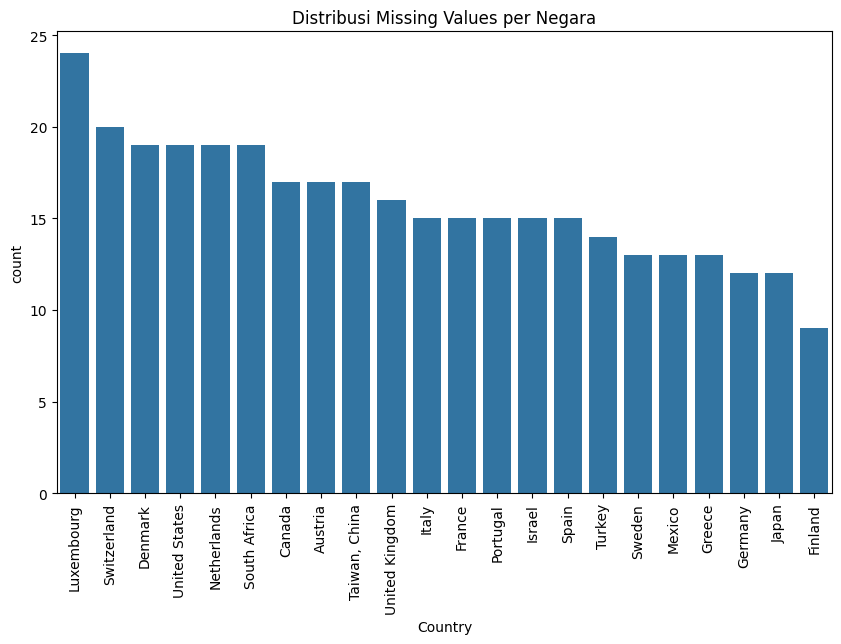

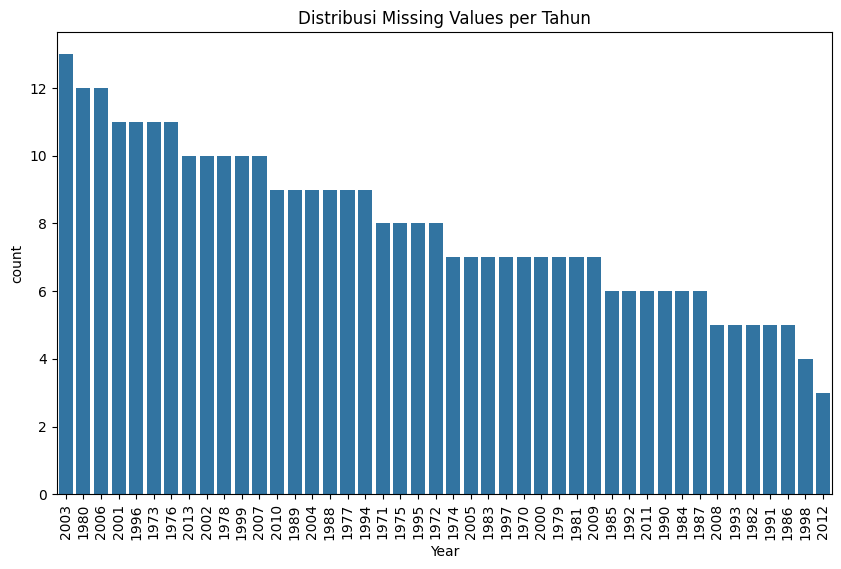

In [7]:
# Misalkan data Anda ada dalam DataFrame bernama df
# Menampilkan missing values per negara
missing_values = train[train['FoodPriceIndex'].isna()]['Country'].value_counts()
print("Missing values per Country:")
print(missing_values)

# Menampilkan missing values per tahun (Year)
missing_by_year = train[train['FoodPriceIndex'].isna()]['Year'].value_counts()
print("\nMissing values per Year:")
print(missing_by_year)

# Visualisasi missing values per negara
plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['FoodPriceIndex'].isna()], x='Country', order=missing_values.index)
plt.title('Distribusi Missing Values per Negara')
plt.xticks(rotation=90)
plt.show()

# Visualisasi missing values per tahun
plt.figure(figsize=(10, 6))
sns.countplot(data=train[train['FoodPriceIndex'].isna()], x='Year', order=missing_by_year.index)
plt.title('Distribusi Missing Values per Tahun')
plt.xticks(rotation=90)
plt.show()


In [8]:
# Menghapus baris dengan missing value
train.dropna(subset=['FoodPriceIndex'], inplace=True)

print(train.isna().sum())

id                0
Country           0
Year              0
Month             0
FoodPriceIndex    0
dtype: int64


In [9]:
print("Test Data missing values:")
print(test.isna().sum())

print("Test Data duplicated: ", test.duplicated().sum())

print('-'*50)

print("Test Data Length: ", len(test))

Test Data missing values:
id         0
Country    0
Year       0
Month      0
dtype: int64
Test Data duplicated:  0
--------------------------------------------------
Test Data Length:  2640


In [10]:
num_cols = train.select_dtypes(include=[np.number]).columns
cat_cols = train.select_dtypes(exclude=[np.number]).columns

num_cols_test = test.select_dtypes(include=[np.number]).columns
cat_cols_test = test.select_dtypes(exclude=[np.number]).columns

print('Numerical Columns: ', num_cols)
print('Categorical Columns: ', cat_cols)

Numerical Columns:  Index(['id', 'Year', 'Month', 'FoodPriceIndex'], dtype='object')
Categorical Columns:  Index(['Country'], dtype='object')


In [11]:
train['Month'].value_counts()

Month
8     945
7     944
6     943
9     942
12    940
4     939
2     939
10    939
1     937
11    936
3     934
5     930
Name: count, dtype: int64

In [12]:
train['Country'].value_counts()

Country
Finland           519
Germany           516
Japan             516
Mexico            515
Greece            515
Sweden            515
Turkey            514
Portugal          513
France            513
Spain             513
Italy             513
Israel            513
United Kingdom    512
Austria           511
Canada            511
Taiwan, China     511
Denmark           509
South Africa      509
Netherlands       509
United States     509
Switzerland       508
Luxembourg        504
Name: count, dtype: int64

In [13]:
test['Country'].value_counts()

Country
Italy             120
Denmark           120
Luxembourg        120
South Africa      120
Austria           120
Sweden            120
Germany           120
Spain             120
Mexico            120
France            120
Greece            120
Switzerland       120
Israel            120
United Kingdom    120
Turkey            120
Taiwan, China     120
Finland           120
Portugal          120
Canada            120
Netherlands       120
United States     120
Japan             120
Name: count, dtype: int64

In [14]:
train['FoodPriceIndex'].value_counts()

FoodPriceIndex
0.0000     475
0.1000      81
0.2000      29
91.7000     28
91.8000     27
          ... 
73.8145      1
64.1200      1
71.5500      1
59.8600      1
81.3921      1
Name: count, Length: 1795, dtype: int64

In [15]:
train['Year'].value_counts()

Year
2012    261
1998    260
1991    259
1982    259
2008    259
1993    259
1986    259
1992    258
2011    258
1990    258
1984    258
1985    258
1987    258
2009    257
1981    257
1970    257
2000    257
1997    257
1983    257
1974    257
1979    257
2005    257
1972    256
1971    256
1975    256
1995    256
2010    255
2004    255
1977    255
1988    255
1994    255
1989    255
2002    254
2013    254
2007    254
1978    254
1999    254
2001    253
1996    253
1973    253
1976    253
1980    252
2006    252
2003    251
Name: count, dtype: int64

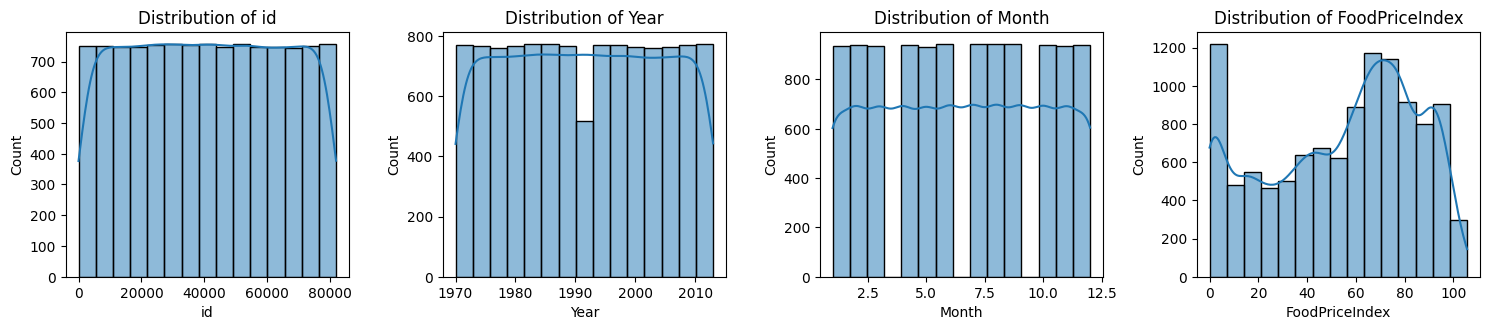

In [16]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot histogram untuk setiap kolom numerik dalam train[num_cols]
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)  # Membagi plot menjadi 2 baris dan 4 kolom
    sns.histplot(train[col], bins=15, kde=True)  # 'kde=True' menambahkan kurva KDE (jika diinginkan)
    plt.title(f"Distribution of {col}")  # Judul untuk tiap subplot

# Tampilkan plot
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()


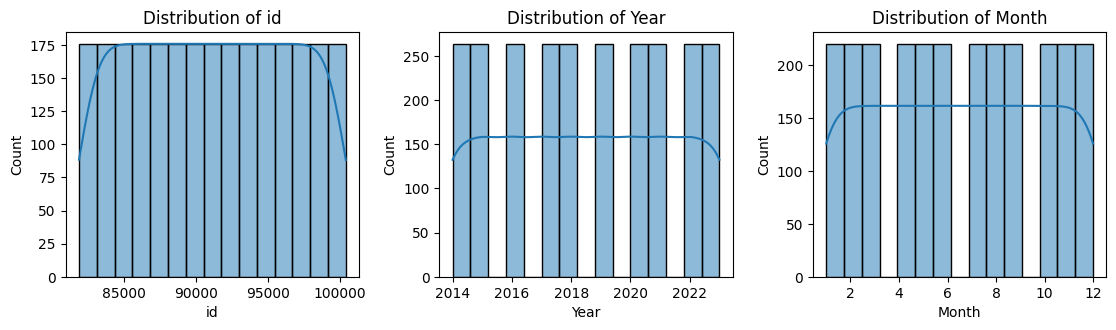

In [17]:
# Set figure size
plt.figure(figsize=(15, 6))

# Plot histogram untuk setiap kolom numerik dalam train[num_cols]
for i, col in enumerate(num_cols_test):
    plt.subplot(2, 4, i + 1)  # Membagi plot menjadi 2 baris dan 4 kolom
    sns.histplot(test[col], bins=15, kde=True)  # 'kde=True' menambahkan kurva KDE (jika diinginkan)
    plt.title(f"Distribution of {col}")  # Judul untuk tiap subplot

# Tampilkan plot
plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih
plt.show()


In [18]:
country_avg = train.groupby('Country')['FoodPriceIndex'].mean()
train['Country_AvgPrice'] = train['Country'].map(country_avg)


# Cyclical encoding untuk bulan
train['Month_sin'] = np.sin(2 * np.pi * train['Month'] / 12)
train['Month_cos'] = np.cos(2 * np.pi * train['Month'] / 12)

# Waktu berlalu dari awal dataset
train['Elapsed_Months'] = (train['Year'] - train['Year'].min()) * 12 + train['Month']

# Kombinasi Year dan Month menjadi YYYYMM
train['YearMonth'] = train['Year'] * 100 + train['Month']

# Menambahkan kolom kuartal
train['Quarter'] = ((train['Month'] - 1) // 3) + 1

# Menambahkan kolom semester
train['Semester'] = ((train['Month'] - 1) // 6) + 1


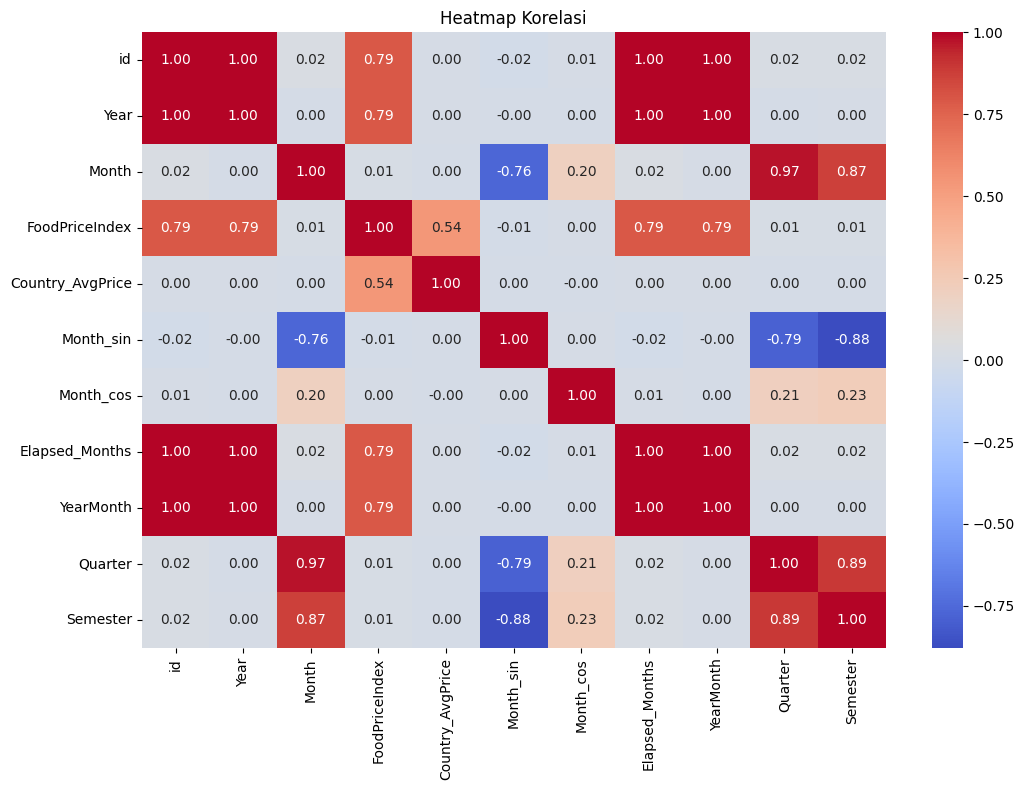

In [19]:
# Hitung matriks korelasi
corr = train.corr(numeric_only=True)  # Pastikan hanya kolom numerik yang digunakan

# Buat heatmap
plt.figure(figsize=(12, 8))  # Atur ukuran figur
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi")
plt.show()

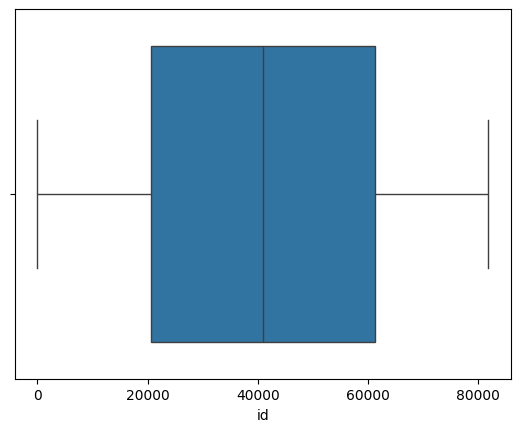

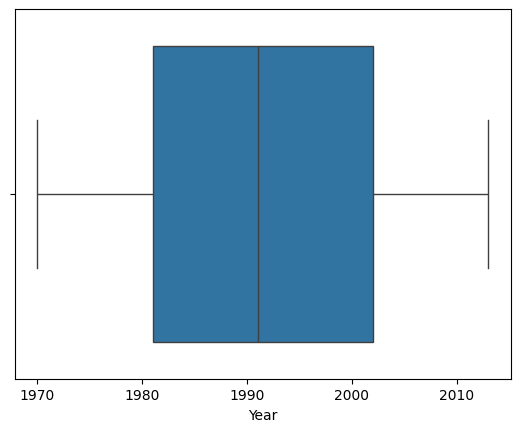

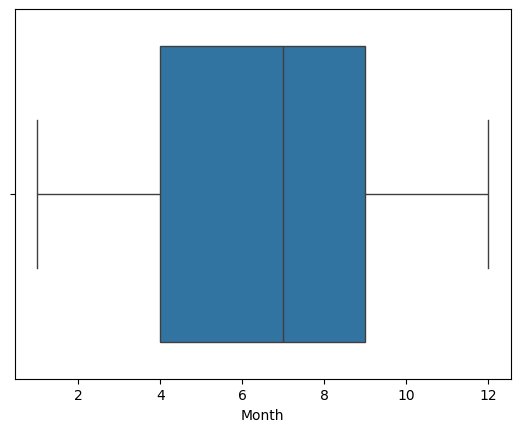

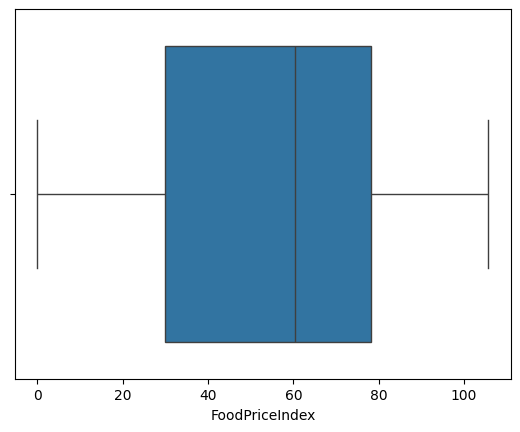

In [20]:
for col in num_cols:
    sns.boxplot(x=train[col])
    plt.show()

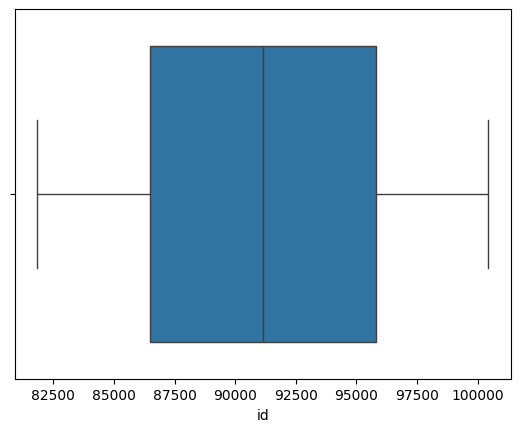

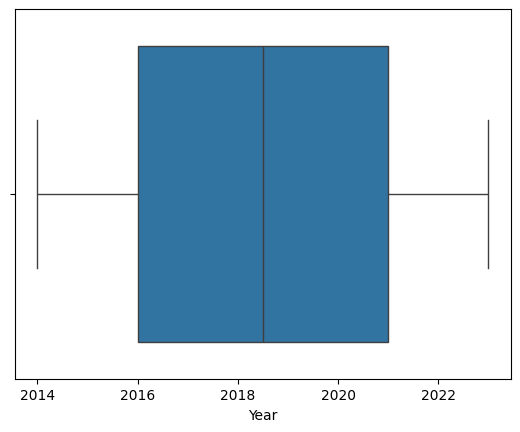

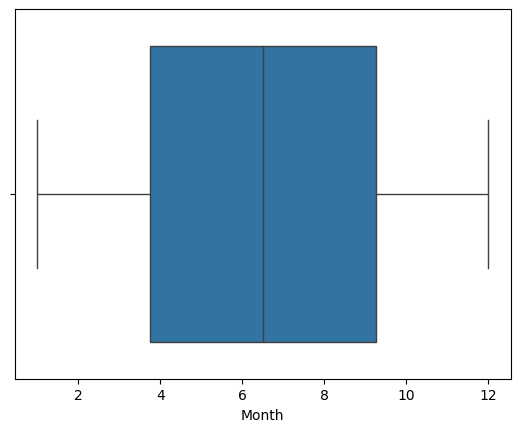

In [21]:
for col in num_cols_test:
    sns.boxplot(x=test[col])
    plt.show()

In [22]:
train

,id,Country,Year,Month,FoodPriceIndex,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester
0,3501,Mexico,1971,11,0.0000,25.490485,-5.000000e-01,8.660254e-01,23,197111,4,2
1,60601,South Africa,2002,7,43.9000,25.660707,-5.000000e-01,-8.660254e-01,391,200207,3,2
2,64399,Japan,2004,8,89.8000,80.070155,-8.660254e-01,-5.000000e-01,416,200408,3,2
3,24227,France,1983,1,48.9000,62.355750,5.000000e-01,8.660254e-01,157,198301,1,1
4,63779,Japan,2004,4,90.2000,80.070155,8.660254e-01,-5.000000e-01,412,200404,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11611,8347,Sweden,1974,6,17.9000,61.974369,1.224647e-16,-1.000000e+00,54,197406,2,1
11612,32121,Germany,1987,4,66.1407,68.830241,8.660254e-01,-5.000000e-01,208,198704,2,1
11613,8561,Germany,1974,8,45.1606,68.830241,-8.660254e-01,-5.000000e-01,56,197408,3,2
11614,45917,Denmark,1994,9,65.6000,59.473870,-1.000000e+00,-1.836970e-16,297,199409,3,2


In [22]:
import category_encoders as ce
X = train.drop(columns=['FoodPriceIndex', 'id'])
y = train['FoodPriceIndex']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

te = ce.TargetEncoder(cols=['Country'])
X_train = te.fit_transform(X_train, y_train)
X_val = te.transform(X_val)

In [23]:
X_train

,Country,Year,Month,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester
10426,52.708049,1999,5,53.095517,5.000000e-01,-0.866025,353,199905,2,1
6551,59.943839,1992,11,59.473870,-5.000000e-01,0.866025,275,199211,4,2
8899,71.744059,1990,2,71.803340,8.660254e-01,0.500000,242,199002,1,1
11548,25.432524,2010,6,25.490485,1.224647e-16,-1.000000,486,201006,2,1
9181,71.744059,2001,6,71.803340,1.224647e-16,-1.000000,378,200106,2,1
...,...,...,...,...,...,...,...,...,...,...
5923,38.852580,1975,6,38.772515,1.224647e-16,-1.000000,66,197506,2,1
5366,50.129975,2004,2,50.526282,8.660254e-01,0.500000,410,200402,1,1
5569,68.940091,2012,4,68.830241,8.660254e-01,-0.500000,508,201204,2,1
884,15.753071,1995,10,15.111868,-8.660254e-01,0.500000,310,199510,4,2


In [24]:
# Calculate sMAPE
def smape(A, F):
    denominator = np.abs(A) + np.abs(F)
    numerator = 2 * np.abs(F - A)
    print(f"Denominator: {denominator}")
    print(f"Numerator: {numerator}")
    return 100/len(A) * np.sum(numerator / denominator)

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodel

Denominator: [108.96008871 104.14763723 116.9246715  ... 190.52595629 196.42595629
 195.72595629]
Numerator: [165.92017743 177.09527446 151.44934299 ...   4.25191257   7.54808743
   6.14808743]
sMAPE: 69.02%


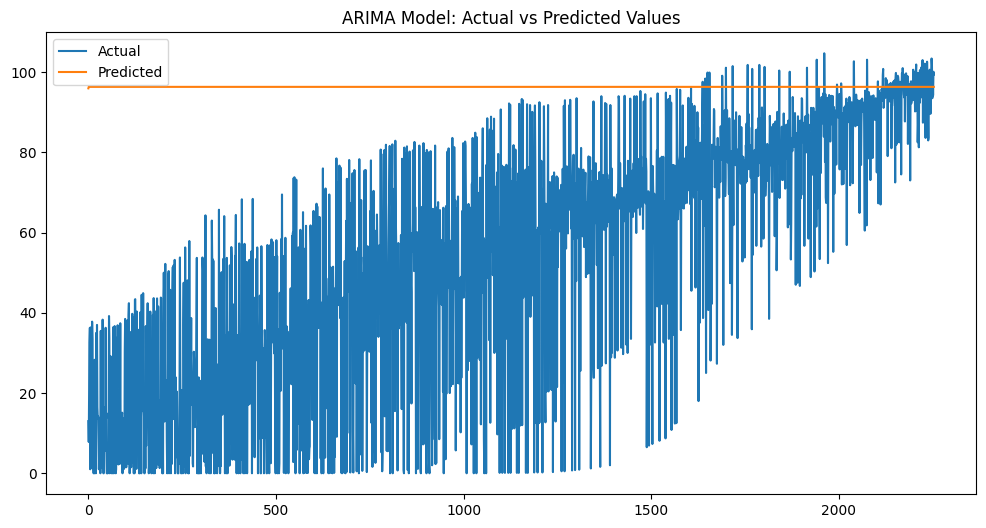

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# Fit ARIMA model
model = ARIMA(X_train_sorted['FoodPriceIndex'], order=(1,1,1))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(y_val))

smape_arima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
print(f'sMAPE: {smape_arima:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(predictions.values, label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted Values')
plt.legend()
plt.show()

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Denominator: [109.28823525 104.96016783 117.83268592 ... 213.01834357 218.10047658
 216.64559683]
Numerator: [166.5764705  178.72033565 153.26537184 ...  49.23668714  35.80095316
  35.69119366]
sMAPE: 78.26%


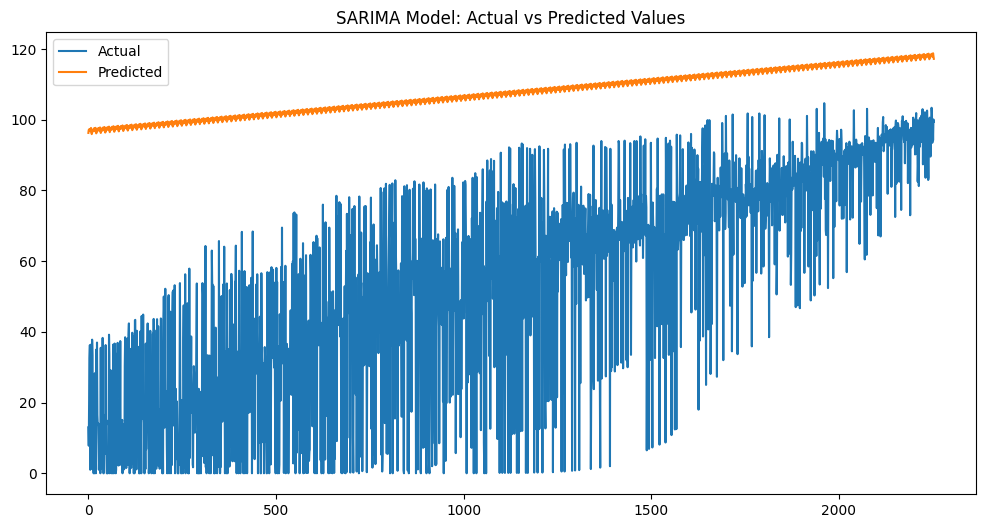

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sort data by Year and Month to ensure time series order
X_train_sorted = pd.concat([y_train, X_train], axis=1).sort_values(['Year', 'Month'])
X_val_sorted = pd.concat([y_val, X_val], axis=1).sort_values(['Year', 'Month'])

# Fit SARIMA model
# Using order=(1,1,1) for ARIMA part and seasonal_order=(1,1,1,12) for seasonal part
model = SARIMAX(X_train_sorted['FoodPriceIndex'], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions
predictions = results.forecast(steps=len(y_val))

smape_sarima = smape(X_val_sorted['FoodPriceIndex'].values, predictions.values)
print(f'sMAPE: {smape_sarima:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(predictions.values, label='Predicted')
plt.title('SARIMA Model: Actual vs Predicted Values')
plt.legend()
plt.show()

16:47:15 - cmdstanpy - INFO - Chain [1] start processing
16:47:17 - cmdstanpy - INFO - Chain [1] done processing


Denominator: [ 33.21007871  19.08476933  37.85378862 ... 218.51184349 222.54928139
 193.11431038]
Numerator: [14.42015743  6.96953867  6.69242275 ... 60.22368697 44.69856279
 11.37137924]
sMAPE: 41.99%


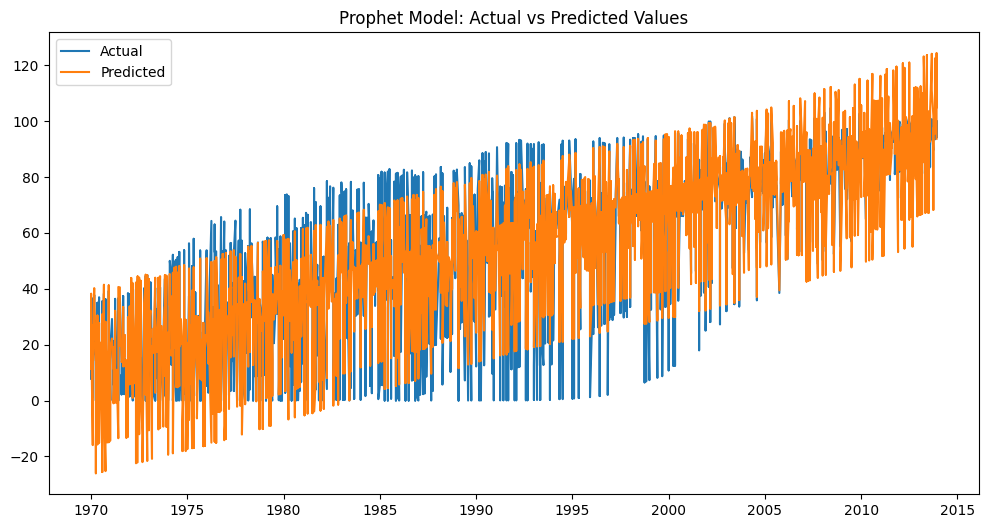

In [27]:
from prophet import Prophet

# Siapkan data untuk Prophet (dengan fitur tambahan sebagai regressor)
prophet_train = pd.DataFrame({
    'ds': pd.to_datetime(X_train_sorted['Year'].astype(str) + '-' + X_train_sorted['Month'].astype(str) + '-01'),
    'y': X_train_sorted['FoodPriceIndex'],
    'Country_AvgPrice': X_train_sorted['Country_AvgPrice'],
    'Month_sin': X_train_sorted['Month_sin'],
    'Month_cos': X_train_sorted['Month_cos'],
    'Elapsed_Months': X_train_sorted['Elapsed_Months'],
    'Quarter': X_train_sorted['Quarter'],
    'Semester': X_train_sorted['Semester']
})

prophet_val = pd.DataFrame({
    'ds': pd.to_datetime(X_val_sorted['Year'].astype(str) + '-' + X_val_sorted['Month'].astype(str) + '-01'),
    'y': X_val_sorted['FoodPriceIndex'],
    'Country_AvgPrice': X_val_sorted['Country_AvgPrice'],
    'Month_sin': X_val_sorted['Month_sin'],
    'Month_cos': X_val_sorted['Month_cos'],
    'Elapsed_Months': X_val_sorted['Elapsed_Months'],
    'Quarter': X_val_sorted['Quarter'],
    'Semester': X_val_sorted['Semester']
})

# Inisialisasi model Prophet dengan regressor tambahan
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Tambahkan fitur eksternal sebagai regressor
model.add_regressor('Country_AvgPrice')
model.add_regressor('Month_sin')
model.add_regressor('Month_cos')
model.add_regressor('Elapsed_Months')
model.add_regressor('Quarter')
model.add_regressor('Semester')

# Fit model Prophet
model.fit(prophet_train)

# Prediksi dengan dataset validasi
forecast = model.predict(prophet_val)

smape_prophet = smape(prophet_val['y'].values, forecast['yhat'].values)
print(f'sMAPE: {smape_prophet:.2f}%')

# Plot nilai aktual vs prediksi
plt.figure(figsize=(12, 6))
plt.plot(prophet_val['ds'], prophet_val['y'], label='Actual')
plt.plot(prophet_val['ds'], forecast['yhat'], label='Predicted')
plt.title('Prophet Model: Actual vs Predicted Values')
plt.legend()
plt.show()


In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

# 1. Load Data
df = train.copy()
# 2. Persiapan Data per Negara
countries = df['Country'].unique()

# Buat model dan scaler
scaler = MinMaxScaler()

# 3. Definisikan Fungsi SMAPE
def smape(y_true, y_pred):
    denominator = K.maximum(K.abs(y_true) + K.abs(y_pred), K.epsilon())  # Untuk menghindari pembagian dengan nol
    diff = K.abs(y_true - y_pred) / denominator
    return 2 * K.mean(diff, axis=-1)

# 4. Menyiapkan Data untuk Model
def prepare_data(country_data, look_back=12):
    # Skala fitur
    country_data_scaled = scaler.fit_transform(country_data[['FoodPriceIndex', 'Month_sin', 'Month_cos', 'Elapsed_Months']])
    
    X, y = [], []
    for i in range(look_back, len(country_data)):
        X.append(country_data_scaled[i-look_back:i, 1:])  # Fitur selain FPI
        y.append(country_data_scaled[i, 0])  # FPI
    
    return np.array(X), np.array(y)

# 5. Model LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))  # Output untuk prediksi FPI
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[smape])  # Menambahkan SMAPE sebagai metrik
    return model

# Loop untuk setiap negara
# 5. Model LSTM dengan Kompleksitas Lebih Tinggi
def create_lstm_model(input_shape):
    model = Sequential()
    
    # Tambahkan Bidirectional LSTM
    model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=input_shape)))
    model.add(Dropout(0.2))  # Dropout untuk menghindari overfitting
    
    # Lapisan LSTM tambahan
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    
    # Lapisan Dense untuk output
    model.add(Dense(1))  # Output untuk prediksi FPI
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[smape])  # Menambahkan SMAPE sebagai metrik
    
    return model

# List untuk menyimpan SMAPE per negara
all_smape = []

# Loop untuk setiap negara
for country in countries:
    print(f"Training model for {country}")
    
    # Filter data untuk negara tertentu
    country_data = df[df['Country'] == country].sort_values(by='YearMonth')
    
    # Persiapkan data
    X, y = prepare_data(country_data)
    
    # Bagi data menjadi training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Bangun model LSTM
    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    
    # Latih model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    
    # Evaluasi model
    test_loss, test_smape = model.evaluate(X_test, y_test)
    print(f"Test Loss for {country}: {test_loss}")
    print(f"Test SMAPE for {country}: {test_smape}")
    
    # Simpan nilai SMAPE untuk negara ini
    all_smape.append((country, test_smape))

    # Simpan model jika perlu
    # model.save(f'{country}_fpi_lstm_model.h5')

# Setelah semua pelatihan selesai, cetak semua nilai SMAPE
print("\nSMAPE for all countries:")
for country, smape_value in all_smape:
    print(f"{country}: {smape_value}")

Training model for Mexico


C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0410 - smape: 1.3895 - val_loss: 0.1283 - val_smape: 0.5598
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - smape: 1.4851 - val_loss: 0.0714 - val_smape: 0.3839
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0084 - smape: 1.5341 - val_loss: 0.0505 - val_smape: 0.3092
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0073 - smape: 1.5387 - val_loss: 0.0356 - val_smape: 0.2545
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - smape: 1.4841 - val_loss: 0.0043 - val_smape: 0.0869
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - smape: 1.4970 - val_loss: 0.0027 - val_smape: 0.0766
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - smape: 1.5213 - val_loss: 0.0142 - val_smape: 0.1282
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0036 - smape: 1.5510 - val_loss: 0.0981 - val_smape: 0.3101
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0262 - smape: 1.2164 - val_loss: 0.1134 - val_smape: 0.5134
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055 - smape: 1.2668 - val_loss: 0.0346 - val_smape: 0.2240
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0039 - smape: 1.3099 - val_loss: 0.0551 - val_smape: 0.3084
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0036 - smape: 1.2331 - val_loss: 0.0325 - val_smape: 0.2171
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031 - smape: 1.2684 - val_loss: 0.0273 - val_smape: 0.2003
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0021 - smape: 1.2605 - val_loss: 0.0412 - val_smape: 0.2677
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027 - smape: 1.2630 - val_loss: 0.0207 - val_smape: 0.1782
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0017 - smape: 1.2723 - val_loss: 0.0130 - val_smape: 0.1408
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.3718 - smape: 1.2248 - val_loss: 0.1104 - val_smape: 0.3026
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0508 - smape: 0.4082 - val_loss: 0.0032 - val_smape: 0.0479
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0306 - smape: 0.4526 - val_loss: 0.0787 - val_smape: 0.2623
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0225 - smape: 0.4328 - val_loss: 0.0617 - val_smape: 0.2358
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0210 - smape: 0.4669 - val_loss: 0.0464 - val_smape: 0.2076
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0185 - smape: 0.4644 - val_loss: 0.0581 - val_smape: 0.2307
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0189 - smape: 0.4374 - val_loss: 0.0430 - val_smape: 0.2016
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0162 - smape: 0.4950 - val_loss: 0.0408 - val_smape: 0.1970
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.1177 - smape: 0.8211 - val_loss: 0.0389 - val_smape: 0.2386
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0222 - smape: 0.6596 - val_loss: 0.0258 - val_smape: 0.1608
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0091 - smape: 0.7634 - val_loss: 0.0313 - val_smape: 0.1761
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - smape: 0.7562 - val_loss: 0.0040 - val_smape: 0.0655
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0063 - smape: 0.7218 - val_loss: 0.0089 - val_smape: 0.0979
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0055 - smape: 0.7265 - val_loss: 0.0014 - val_smape: 0.0396
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0057 - smape: 0.7455 - val_loss: 0.0015 - val_smape: 0.0400
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043 - smape: 0.8021 - val_loss: 5.2310e-04 - val_smape: 0.0248
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 0.1168 - smape: 1.0084 - val_loss: 0.0472 - val_smape: 0.2623
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0217 - smape: 0.6272 - val_loss: 0.0020 - val_smape: 0.0472
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0106 - smape: 0.6812 - val_loss: 0.0011 - val_smape: 0.0397
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0055 - smape: 0.6902 - val_loss: 0.0024 - val_smape: 0.0513
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0055 - smape: 0.6881 - val_loss: 0.0025 - val_smape: 0.0526
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - smape: 0.6993 - val_loss: 0.0030 - val_smape: 0.0563
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042 - smape: 0.7157 - val_loss: 0.0063 - val_smape: 0.0785
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - smape: 0.6875 - val_loss: 0.0039 - val_smape: 0.0623
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0835 - smape: 0.8715 - val_loss: 0.0284 - val_smape: 0.2037
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - smape: 0.5813 - val_loss: 0.0051 - val_smape: 0.0776
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0073 - smape: 0.5368 - val_loss: 0.0059 - val_smape: 0.0833
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0057 - smape: 0.5888 - val_loss: 0.0031 - val_smape: 0.0602
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - smape: 0.5596 - val_loss: 0.0032 - val_smape: 0.0608
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - smape: 0.5558 - val_loss: 0.0036 - val_smape: 0.0641
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - smape: 0.5742 - val_loss: 0.0052 - val_smape: 0.0766
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - smape: 0.5476 - val_loss: 0.0057 - val_smape: 0.0801
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.1587 - smape: 0.8588 - val_loss: 0.0082 - val_smape: 0.0885
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0319 - smape: 0.5425 - val_loss: 0.0243 - val_smape: 0.1404
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - smape: 0.5323 - val_loss: 0.0271 - val_smape: 0.1448
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - smape: 0.6105 - val_loss: 0.0460 - val_smape: 0.1935
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - smape: 0.6134 - val_loss: 0.0322 - val_smape: 0.1624
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0073 - smape: 0.5853 - val_loss: 0.0309 - val_smape: 0.1601
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0083 - smape: 0.5814 - val_loss: 0.0317 - val_smape: 0.1629
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - smape: 0.5843 - val_loss: 0.0237 - val_smape: 0.1403
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.1210 - smape: 1.0429 - val_loss: 0.0605 - val_smape: 0.3167
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0188 - smape: 0.5817 - val_loss: 0.0168 - val_smape: 0.1508
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0066 - smape: 0.6066 - val_loss: 0.0055 - val_smape: 0.0817
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0056 - smape: 0.6964 - val_loss: 7.9243e-04 - val_smape: 0.0350
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0033 - smape: 0.7067 - val_loss: 0.0050 - val_smape: 0.0758
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0032 - smape: 0.6850 - val_loss: 0.0047 - val_smape: 0.0736
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0038 - smape: 0.6753 - val_loss: 0.0063 - val_smape: 0.0858
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031 - smape: 0.6649 - val_loss: 0.0046 - val_smape: 0.0715
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.1324 - smape: 1.1350 - val_loss: 0.0481 - val_smape: 0.2652
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0303 - smape: 0.9391 - val_loss: 0.0605 - val_smape: 0.2265
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0106 - smape: 1.0233 - val_loss: 0.0769 - val_smape: 0.2504
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0073 - smape: 1.0900 - val_loss: 0.0317 - val_smape: 0.1660
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0076 - smape: 0.9702 - val_loss: 0.0089 - val_smape: 0.0856
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0062 - smape: 1.0058 - val_loss: 0.0148 - val_smape: 0.1126
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - smape: 1.0065 - val_loss: 0.0121 - val_smape: 0.1010
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0060 - smape: 1.0372 - val_loss: 0.0144 - val_smape: 0.1114
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.1202 - smape: 1.1502 - val_loss: 0.0322 - val_smape: 0.2117
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0168 - smape: 0.5140 - val_loss: 0.0216 - val_smape: 0.1704
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - smape: 0.5535 - val_loss: 0.0041 - val_smape: 0.0677
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - smape: 0.6077 - val_loss: 0.0029 - val_smape: 0.0578
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0033 - smape: 0.5615 - val_loss: 0.0109 - val_smape: 0.1119
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - smape: 0.6169 - val_loss: 0.0060 - val_smape: 0.0816
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0032 - smape: 0.5479 - val_loss: 0.0091 - val_smape: 0.1012
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0029 - smape: 0.5911 - val_loss: 0.0072 - val_smape: 0.0894
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.1259 - smape: 1.0276 - val_loss: 0.0574 - val_smape: 0.2943
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0233 - smape: 0.5863 - val_loss: 0.0023 - val_smape: 0.0519
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - smape: 0.6377 - val_loss: 0.0010 - val_smape: 0.0387
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0062 - smape: 0.6944 - val_loss: 0.0012 - val_smape: 0.0394
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - smape: 0.6850 - val_loss: 0.0014 - val_smape: 0.0408
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - smape: 0.6597 - val_loss: 0.0016 - val_smape: 0.0435
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0037 - smape: 0.6437 - val_loss: 0.0017 - val_smape: 0.0448
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0049 - smape: 0.7062 - val_loss: 0.0019 - val_smape: 0.0474
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.1122 - smape: 1.1199 - val_loss: 0.0432 - val_smape: 0.2498
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0168 - smape: 0.6209 - val_loss: 0.0111 - val_smape: 0.1153
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0052 - smape: 0.7032 - val_loss: 0.0020 - val_smape: 0.0487
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0032 - smape: 0.7784 - val_loss: 0.0018 - val_smape: 0.0471
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0025 - smape: 0.7529 - val_loss: 0.0036 - val_smape: 0.0628
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027 - smape: 0.7283 - val_loss: 0.0015 - val_smape: 0.0425
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027 - smape: 0.7215 - val_loss: 0.0046 - val_smape: 0.0709
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - smape: 0.7065 - val_loss: 0.0028 - val_smape: 0.0556
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0863 - smape: 1.1580 - val_loss: 0.0870 - val_smape: 0.3787
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - smape: 1.1442 - val_loss: 0.0212 - val_smape: 0.1420
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0102 - smape: 1.2718 - val_loss: 0.0057 - val_smape: 0.0715
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - smape: 1.1652 - val_loss: 0.0064 - val_smape: 0.0744
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0062 - smape: 1.2011 - val_loss: 0.0071 - val_smape: 0.0763
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - smape: 1.1853 - val_loss: 0.0061 - val_smape: 0.0689
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - smape: 1.2365 - val_loss: 0.0078 - val_smape: 0.0770
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - smape: 1.1937 - val_loss: 0.0076 - val_smape: 0.0753
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.1877 - smape: 1.2331 - val_loss: 0.0048 - val_smape: 0.0713
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0351 - smape: 0.6105 - val_loss: 0.0080 - val_smape: 0.0891
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - smape: 0.6079 - val_loss: 0.0059 - val_smape: 0.0841
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - smape: 0.6739 - val_loss: 0.0126 - val_smape: 0.1210
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - smape: 0.6619 - val_loss: 0.0052 - val_smape: 0.0783
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - smape: 0.6405 - val_loss: 0.0051 - val_smape: 0.0771
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - smape: 0.6374 - val_loss: 0.0050 - val_smape: 0.0757
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076 - smape: 0.6809 - val_loss: 0.0047 - val_smape: 0.0728
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.1020 - smape: 1.0318 - val_loss: 0.0795 - val_smape: 0.3635
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - smape: 0.7656 - val_loss: 0.0021 - val_smape: 0.0457
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0052 - smape: 0.9064 - val_loss: 0.0028 - val_smape: 0.0518
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0054 - smape: 0.8948 - val_loss: 0.0029 - val_smape: 0.0568
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035 - smape: 0.8481 - val_loss: 0.0018 - val_smape: 0.0443
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0026 - smape: 0.8442 - val_loss: 0.0020 - val_smape: 0.0459
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0036 - smape: 0.8943 - val_loss: 7.5864e-04 - val_smape: 0.0308
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0025 - smape: 0.8805 - val_loss: 0.0016 - val_smape: 0.0420
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0176 - smape: 1.7428 - val_loss: 0.2014 - val_smape: 0.8467
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - smape: 1.7847 - val_loss: 0.2099 - val_smape: 0.8775
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - smape: 1.7649 - val_loss: 0.2237 - val_smape: 0.9241
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0078 - smape: 1.7719 - val_loss: 0.1163 - val_smape: 0.5675
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - smape: 1.7715 - val_loss: 0.1470 - val_smape: 0.6819
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - smape: 1.7865 - val_loss: 0.0767 - val_smape: 0.4530
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - smape: 1.7935 - val_loss: 0.0022 - val_smape: 0.1013
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - smape: 1.8418 - val_loss: 0.0361 - val_smape: 0.3230
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.1073 - smape: 0.7553 - val_loss: 0.0293 - val_smape: 0.2012
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - smape: 0.4537 - val_loss: 0.0014 - val_smape: 0.0397
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 - smape: 0.5095 - val_loss: 0.0013 - val_smape: 0.0391
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0085 - smape: 0.5201 - val_loss: 0.0014 - val_smape: 0.0399
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - smape: 0.5057 - val_loss: 0.0017 - val_smape: 0.0426
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0070 - smape: 0.5190 - val_loss: 0.0016 - val_smape: 0.0417
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0061 - smape: 0.4934 - val_loss: 0.0014 - val_smape: 0.0383
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - smape: 0.5165 - val_loss: 0.0012 - val_smape: 0.0373
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.1277 - smape: 1.1369 - val_loss: 0.0477 - val_smape: 0.2713
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0213 - smape: 0.7468 - val_loss: 0.0011 - val_smape: 0.0369
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - smape: 0.8024 - val_loss: 0.0074 - val_smape: 0.0902
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - smape: 0.9071 - val_loss: 1.3407e-04 - val_smape: 0.0228
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031 - smape: 0.8816 - val_loss: 2.6304e-04 - val_smape: 0.0247
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039 - smape: 0.8772 - val_loss: 0.0023 - val_smape: 0.0515
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - smape: 0.8884 - val_loss: 0.0035 - val_smape: 0.0630
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0032 - smape: 0.8846 - val_loss: 8.5611e-04 - val_smape: 0.0337
Epoch 9/50
13/13 ━━━━━━━━━━━━━━

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.1384 - smape: 1.1901 - val_loss: 0.0368 - val_smape: 0.2155
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0212 - smape: 0.6445 - val_loss: 0.0310 - val_smape: 0.1991
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - smape: 0.5987 - val_loss: 0.0075 - val_smape: 0.0927
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0050 - smape: 0.7017 - val_loss: 0.0066 - val_smape: 0.0857
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - smape: 0.6985 - val_loss: 0.0072 - val_smape: 0.0919
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0038 - smape: 0.6924 - val_loss: 0.0078 - val_smape: 0.0956
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0032 - smape: 0.7078 - val_loss: 0.0063 - val_smape: 0.0891
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0038 - smape: 0.7172 - val_loss: 0.0085 - val_smape: 0.0987
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.1146 - smape: 1.0026 - val_loss: 0.0293 - val_smape: 0.2058
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - smape: 0.5599 - val_loss: 0.0023 - val_smape: 0.0510
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069 - smape: 0.5911 - val_loss: 0.0013 - val_smape: 0.0433
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0051 - smape: 0.6114 - val_loss: 0.0028 - val_smape: 0.0560
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0050 - smape: 0.6516 - val_loss: 0.0015 - val_smape: 0.0422
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - smape: 0.5903 - val_loss: 0.0028 - val_smape: 0.0558
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0037 - smape: 0.6014 - val_loss: 0.0019 - val_smape: 0.0473
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0044 - smape: 0.6452 - val_loss: 0.0020 - val_smape: 0.0484
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0560 - smape: 1.2449 - val_loss: 0.1169 - val_smape: 0.4890
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0159 - smape: 1.3557 - val_loss: 0.0025 - val_smape: 0.0587
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0084 - smape: 1.3862 - val_loss: 0.0034 - val_smape: 0.0662
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - smape: 1.3130 - val_loss: 6.4811e-04 - val_smape: 0.0370
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - smape: 1.3057 - val_loss: 0.0028 - val_smape: 0.0589
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - smape: 1.3857 - val_loss: 0.0077 - val_smape: 0.0926
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0058 - smape: 1.3937 - val_loss: 0.0036 - val_smape: 0.0643
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0051 - smape: 1.3740 - val_loss: 0.0167 - val_smape: 0.1343
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.1549 - smape: 0.9975 - val_loss: 0.0030 - val_smape: 0.0532
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0266 - smape: 0.6592 - val_loss: 0.0162 - val_smape: 0.1314
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0176 - smape: 0.7231 - val_loss: 0.0056 - val_smape: 0.0769
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0134 - smape: 0.7706 - val_loss: 0.0232 - val_smape: 0.1557
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0125 - smape: 0.7459 - val_loss: 0.0129 - val_smape: 0.1170
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - smape: 0.7584 - val_loss: 0.0235 - val_smape: 0.1560
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0107 - smape: 0.7785 - val_loss: 0.0067 - val_smape: 0.0816
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0089 - smape: 0.7400 - val_loss: 0.0025 - val_smape: 0.0445
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16m

Denominator: [ 26.373     15.958     41.403    ... 187.017    200.057674 198.2502  ]
Numerator: [0.746    0.716    0.406    ... 2.766    0.284652 1.0996  ]
sMAPE: nan%


C:\Users\booma\AppData\Local\Temp\ipykernel_21732\310606691.py:7: RuntimeWarning: invalid value encountered in divide
  return 100/len(A) * np.sum(numerator / denominator)


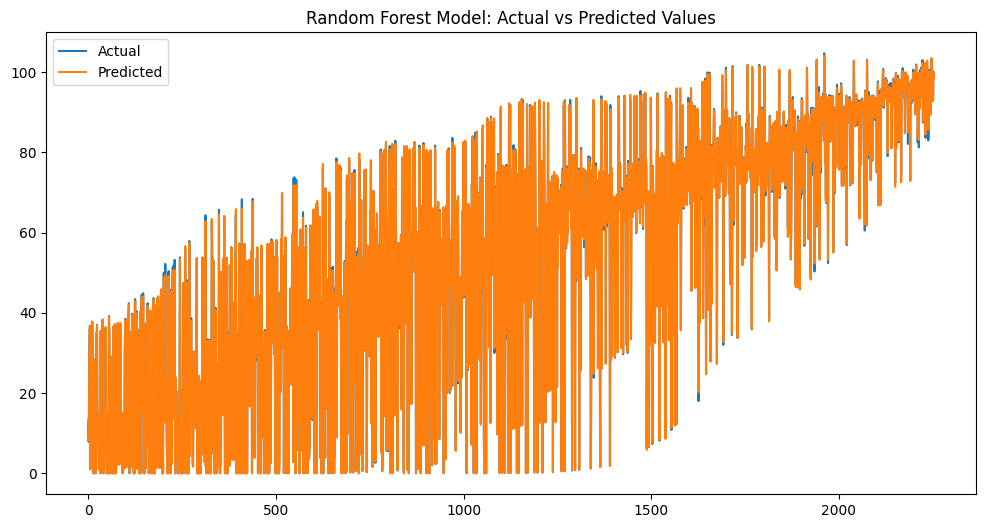


Feature Importance:
            feature  importance
7         YearMonth    0.333014
6    Elapsed_Months    0.313436
0           Country    0.168087
3  Country_AvgPrice    0.168016
1              Year    0.017127
4         Month_sin    0.000095
2             Month    0.000095
5         Month_cos    0.000081
8           Quarter    0.000035
9          Semester    0.000016


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
rf_predictions = rf_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

# Calculate sMAPE
smape_rf = smape(X_val_sorted['FoodPriceIndex'].values, rf_predictions)
print(f'sMAPE: {smape_rf:.2f}%') 

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(rf_predictions, label='Predicted')
plt.title('Random Forest Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester'],
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

Denominator: [ 28.88289044  16.16074879  40.37400138 ... 187.37232048 198.9904949
 197.4029584 ]
Numerator: [5.76578088 1.12149757 1.65199725 ... 2.05535905 2.4190102  2.7940832 ]
sMAPE: nan%


C:\Users\booma\AppData\Local\Temp\ipykernel_21732\310606691.py:7: RuntimeWarning: invalid value encountered in divide
  return 100/len(A) * np.sum(numerator / denominator)


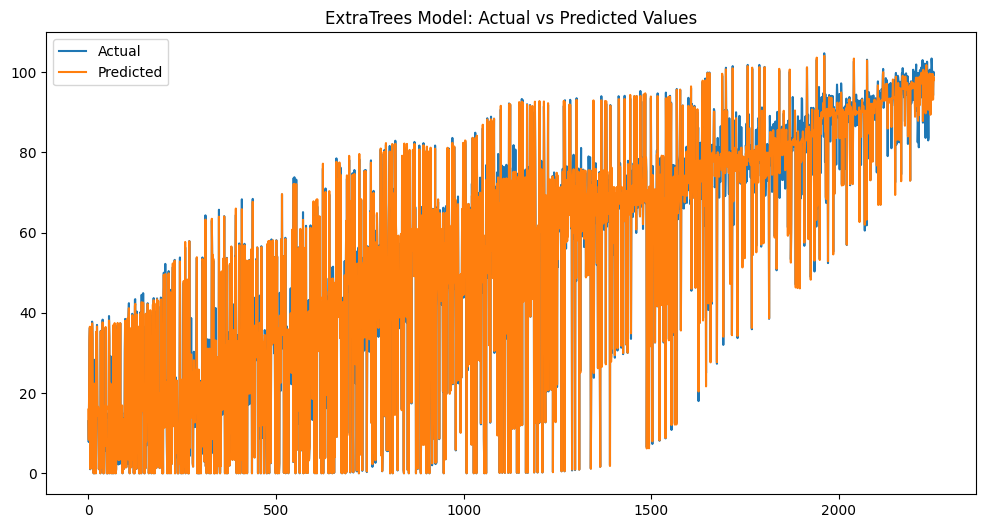


Feature Importance:
            feature  importance
6    Elapsed_Months    0.223840
1              Year    0.222338
7         YearMonth    0.208922
3  Country_AvgPrice    0.174813
0           Country    0.169923
9          Semester    0.000050
8           Quarter    0.000037
2             Month    0.000037
4         Month_sin    0.000021
5         Month_cos    0.000019


In [30]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize and train the model with tuned parameters
extra_model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
extra_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
extra_predictions = extra_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

smape_extra = smape(X_val_sorted['FoodPriceIndex'].values, extra_predictions)
print(f'sMAPE: {smape_extra:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(extra_predictions, label='Predicted')
plt.title('ExtraTrees Model: Actual vs Predicted Values')
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester'],
    'importance': extra_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))


Denominator: [ 26.41358662  16.09324532  41.46874199 ... 186.75581665 201.08210144
 199.09602203]
Numerator: [0.82717323 0.98649063 0.53748398 ... 3.2883667  1.76420288 0.59204407]
sMAPE: 11.97%


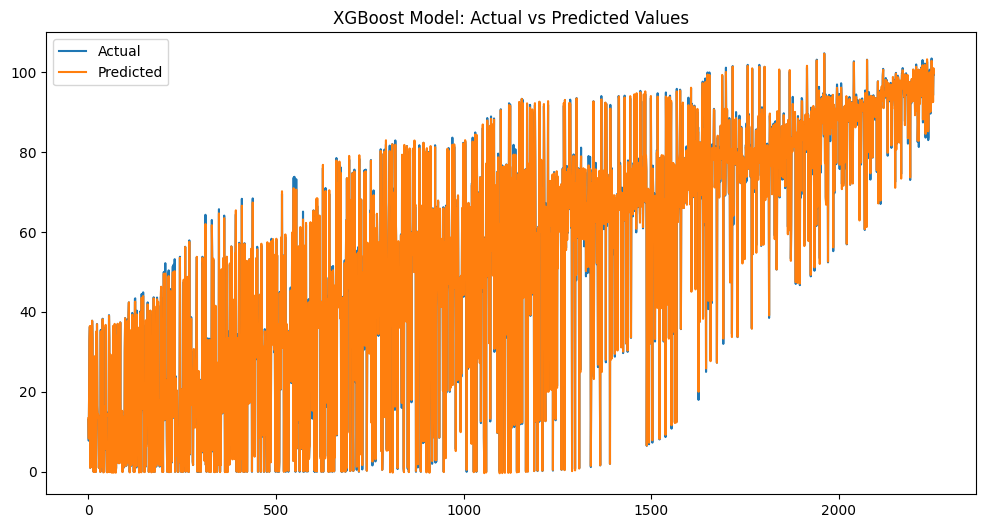


Feature Importance:
            feature  importance
7         YearMonth    0.292295
6    Elapsed_Months    0.274262
1              Year    0.185396
0           Country    0.126013
3  Country_AvgPrice    0.121156
8           Quarter    0.000287
4         Month_sin    0.000259
2             Month    0.000208
5         Month_cos    0.000125
9          Semester    0.000000


In [31]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(
    n_estimators=500,               # Jumlah pohon yang lebih banyak
    learning_rate=0.05,             # Kecepatan pembelajaran yang lebih kecil untuk kestabilan
    max_depth=6,                    # Kedalaman pohon standar
    subsample=0.8,                  # Menggunakan sebagian data untuk setiap pohon
    colsample_bytree=0.8,           # Menggunakan sebagian fitur untuk setiap pohon
    gamma=0.1,                      # Pengurangan minimum untuk pembelahan pohon
    min_child_weight=1,    # Menghentikan pelatihan lebih awal jika tidak ada peningkatan
    tree_method='hist',             # Menggunakan metode histogram untuk pohon yang lebih cepat
    random_state=42                 # Mengatur seed untuk hasil yang dapat direproduksi
)
# Fit the XGBoost model
xgb_model.fit(X_train_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']], X_train_sorted['FoodPriceIndex'])

# Make predictions
xgb_predictions = xgb_model.predict(X_val_sorted[['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester']])

# Calculate sMAPE for XGBoost
smape_xgb = smape(X_val_sorted['FoodPriceIndex'].values, xgb_predictions)
print(f'sMAPE: {smape_xgb:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(xgb_predictions, label='Predicted')
plt.title('XGBoost Model: Actual vs Predicted Values')  # Update title to reflect XGBoost
plt.legend()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': ['Country', 'Year', 'Month', 'Country_AvgPrice', 'Month_sin', 'Month_cos', 'Elapsed_Months',	'YearMonth', 'Quarter', 'Semester'],
    'importance': xgb_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

Denominator: [ 28.97888444  17.17786629  40.42536934 ... 196.25692616 201.10918827
 196.28224843]
Numerator: [ 5.95776887  3.15573257  1.54926133 ... 15.71385233  1.81837655
  5.03550315]
sMAPE: 21.39%


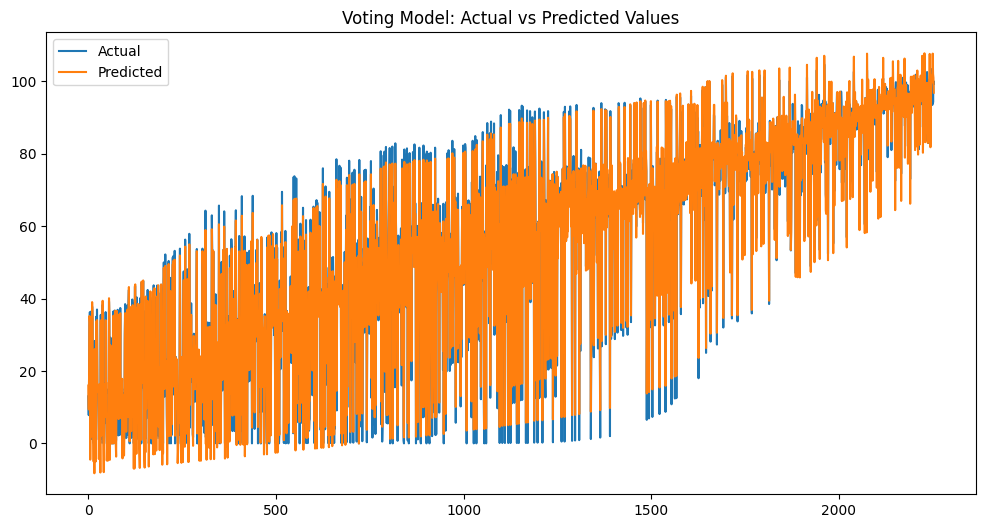

In [32]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

# Inisialisasi model dasar
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = XGBRegressor(n_estimators=100, random_state=42)

# Inisialisasi model Voting
voting_model = VotingRegressor(estimators=[('lr', model1), ('rf', model2), ('xgb', model3)])

# Fit the XGBoost model
voting_model.fit(X_train_sorted[['Country', 'Year', 'Month']], X_train_sorted['FoodPriceIndex'])

# Make predictions
voting_predictions = voting_model.predict(X_val_sorted[['Country', 'Year', 'Month']])

# Calculate sMAPE for XGBoost
smape_voting = smape(X_val_sorted['FoodPriceIndex'].values, voting_predictions)
print(f'sMAPE: {smape_voting:.2f}%')

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(X_val_sorted['FoodPriceIndex'].values, label='Actual')
plt.plot(voting_predictions, label='Predicted')
plt.title('Voting Model: Actual vs Predicted Values')  # Update title to reflect XGBoost
plt.legend()
plt.show()

In [33]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp_model.fit(X_train_sorted[['Country', 'Year', 'Month']], X_train_sorted['FoodPriceIndex'])
predictions_mlp = mlp_model.predict(X_val_sorted[['Country', 'Year', 'Month']])

smape_mlp = smape(X_val_sorted['FoodPriceIndex'], predictions_mlp)
print(f'sMAPE MLP: {smape_mlp:.2f}%')

Denominator: 7492      76.350509
5907      62.273306
10839     81.164358
7095     113.923788
1892     106.333628
            ...    
8338     175.654540
6622     183.213660
10598    176.406148
7898     163.588673
2206     152.566924
Name: FoodPriceIndex, Length: 2254, dtype: float64
Numerator: 7492     100.701019
5907      93.346612
10839     79.928716
7095      97.447576
1892      67.584455
            ...    
8338      22.690921
6622      32.772679
10598     23.987704
7898      73.222655
2206      92.466151
Name: FoodPriceIndex, Length: 2254, dtype: float64
sMAPE MLP: 55.42%


In [36]:
train["YearMonth"] = pd.to_datetime(train["YearMonth"], format="%Y%m")

In [44]:
train_data = train.copy()
te = ce.TargetEncoder(cols=['Country'])
train_data = te.fit_transform(train_data.drop('FoodPriceIndex',axis=1), train_data['FoodPriceIndex'])

In [47]:
train_data['FoodPriceIndex'] = train['FoodPriceIndex']

In [51]:
from darts import TimeSeries
country_series = {}
for country, group in train_data.groupby("Country"):
    group["YearMonth"] = pd.to_datetime(group["YearMonth"])
    country_series[country] = TimeSeries.from_dataframe(
        group,
        time_col="YearMonth",
        value_cols="FoodPriceIndex",
        fill_missing_dates=True,
        freq="MS"
    )

In [52]:
from darts.dataprocessing.dataprocessing.splitter import TrainTestSplitter

# Membagi data dengan TrainTestSplitter (80% train, 20% test)
from darts.models import ARIMA
splitter = TrainTestSplitter(test_size=0.2)

train_series = {}
test_series = {}

for country, series in country_series.items():
    train, test = splitter.split(series)
    train_series[country] = train
    test_series[country] = test

models = {}
for country, train in train_series.items():
    model = ARIMA()
    model.fit(train)
    models[country] = model
from darts.metrics import smape

for country, model in models.items():
    test = test_series[country]
    pred = model.predict(len(test))
    error = smape(test, pred)
    print(f"sMAPE for {country}: {error:.2f}")


ModuleNotFoundError: No module named 'darts.utils.splitter'

In [65]:
from darts.models import RNNModel
model_per_country = {}
for country, series in country_series.items():
    model = RNNModel(
        model="LSTM",
        input_chunk_length=12,  # Panjang input untuk prediksi
        output_chunk_length=1,  # Panjang prediksi (misalnya 1 bulan)
        n_epochs=50,  # Jumlah epoch pelatihan
        random_state=42
    )
    # Train model pada data series
    model.fit(series)
    model_per_country[country] = model


array([13.373   ,  8.158   , 20.803   , ..., 92.817   , 99.957674,
       98.8502  ])

In [66]:
# Check for zero or NaN values in actual values
zero_mask = X_val_sorted['FoodPriceIndex'] == 0
print(f"Zero values in actuals: {X_val_sorted['FoodPriceIndex'][zero_mask].shape[0]}")

# Check for NaN values in actual and predicted values
print(f"NaN values in actuals: {X_val_sorted['FoodPriceIndex'].isna().sum()}")
print(f"NaN values in predictions: {np.isnan(rf_predictions).sum()}")

# Check if actual and predicted values have the same length
print(f"Length of actuals: {len(X_val_sorted['FoodPriceIndex'])}")
print(f"Length of predictions: {len(rf_predictions)}")

# Inspect predictions to ensure they're not constant or unrealistic
print(f"Sample of predictions: {rf_predictions[:10]}")

Zero values in actuals: 103
NaN values in actuals: 0
NaN values in predictions: 0
Length of actuals: 2254
Length of predictions: 2254
Sample of predictions: [13.373     8.158    20.803    32.994    36.809222  1.       16.404
  1.352    36.817333  8.124   ]


In [67]:
# Filter out zero actual values
non_zero_mask = X_val_sorted['FoodPriceIndex'] != 0

# Apply the mask to both actual and predicted values
smape_rf = smape(X_val_sorted['FoodPriceIndex'][non_zero_mask].values, 
                 rf_predictions[non_zero_mask])

print(f'sMAPE: {smape_rf:.2f}%')

Denominator: [ 26.373     15.958     41.403    ... 187.017    200.057674 198.2502  ]
Numerator: [0.746    0.716    0.406    ... 2.766    0.284652 1.0996  ]
sMAPE: 0.95%


In [68]:
test.drop('id', axis=1, inplace=True)
test.head()

,Country,Year,Month
0,Italy,2023,4
1,Denmark,2022,7
2,United States,2019,6
3,Netherlands,2021,2
4,Italy,2019,8


In [69]:
# Gunakan rata-rata negara berdasarkan data train
test['Country_AvgPrice'] = test['Country'].map(country_avg)

# Karena test tidak memiliki kolom FoodPriceIndex, tidak bisa membuat lagging dan moving average

# Cyclical encoding untuk bulan
test['Month_sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_cos'] = np.cos(2 * np.pi * test['Month'] / 12)

# Waktu berlalu dari awal dataset
test['Elapsed_Months'] = (test['Year'] - train['Year'].min()) * 12 + test['Month']

# Kombinasi Year dan Month menjadi YYYYMM
test['YearMonth'] = test['Year'] * 100 + test['Month']

# Menambahkan kolom kuartal
test['Quarter'] = ((test['Month'] - 1) // 3) + 1

# Menambahkan kolom semester
test['Semester'] = ((test['Month'] - 1) // 6) + 1

In [70]:
# apply target encoding to test data
test = te.transform(test)
test.head()

,Country,Year,Month,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester
0,52.708049,2023,4,53.095517,8.660254e-01,-0.500000,640,202304,2,1
1,59.943839,2022,7,59.473870,-5.000000e-01,-0.866025,631,202207,3,2
2,55.878469,2019,6,55.588998,1.224647e-16,-1.000000,594,201906,2,1
3,71.744059,2021,2,71.803340,8.660254e-01,0.500000,614,202102,1,1
4,52.708049,2019,8,53.095517,-8.660254e-01,-0.500000,596,201908,3,2


In [71]:
# apply predictions
test['FoodPriceIndex'] = rf_model.predict(test)
test

,Country,Year,Month,Country_AvgPrice,Month_sin,Month_cos,Elapsed_Months,YearMonth,Quarter,Semester,FoodPriceIndex
0,52.708049,2023,4,53.095517,8.660254e-01,-5.000000e-01,640,202304,2,1,99.260000
1,59.943839,2022,7,59.473870,-5.000000e-01,-8.660254e-01,631,202207,3,2,99.796000
2,55.878469,2019,6,55.588998,1.224647e-16,-1.000000e+00,594,201906,2,1,96.249000
3,71.744059,2021,2,71.803340,8.660254e-01,5.000000e-01,614,202102,1,1,99.042354
4,52.708049,2019,8,53.095517,-8.660254e-01,-5.000000e-01,596,201908,3,2,99.596000
...,...,...,...,...,...,...,...,...,...,...,...
2635,61.501546,2022,2,62.355750,8.660254e-01,5.000000e-01,626,202202,1,1,100.108416
2636,59.943839,2020,4,59.473870,8.660254e-01,-5.000000e-01,604,202004,2,1,99.778000
2637,43.888835,2017,1,43.862136,5.000000e-01,8.660254e-01,565,201701,1,1,99.718000
2638,43.888835,2020,3,43.862136,1.000000e+00,6.123234e-17,603,202003,1,1,99.870000


In [72]:
submission = pd.read_csv(r'D:\Visual Studio\Lomba\Lomba Adikara\sample_submission_adikara2024.csv')
submission.head()

,id,FoodPriceIndex
0,99116,20.5
1,97687,20.5
2,92061,20.5
3,95122,20.5
4,92296,20.5


In [73]:
submission['FoodPriceIndex'] = test['FoodPriceIndex']
submission

,id,FoodPriceIndex
0,99116,99.260000
1,97687,99.796000
2,92061,96.249000
3,95122,99.042354
4,92296,99.596000
...,...,...
2635,96922,100.108416
2636,93502,99.778000
2637,87476,99.718000
2638,93366,99.870000


In [74]:
# submission.to_csv("D:/Visual Studio/Lomba/Lomba Adikara/mbc14.csv", index=False)